Analyzing 911 Calls and 
[Click here for live site!](https://m-sender.github.io/ServiceLearning)

# **Max Sender and Sam Traylor**

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### We find this data set to be very insightful and can answer a lot of different questions. One route we can take is analyzing the data set to focusing on emergency response and answer questions regarding that. If this route is chosen, another dataset that could be of use is [Police Zone Information](https://data.nola.gov/dataset/Police-Zones/fngt-zkj9). This lets us expand our questions to answer more zone and area specific questions. Questions that we can answer going this route are:

*   Average response time by incident?

*   We could extract a column of response times (using TimeArrive - TimeDispatch values) and take the mean of those values for each type of incident

*   Average response time by zone/area?

*   Using that same response time column, we could look at the means across different areas (using the police district or zip column of this dataset)

*   Average response time by incident in specific areas?

*   Using the results of the last question, we could further specify the avergage response time across incident type column values AND area column values.

*   Using zone information and response time, determine "holes" in the zones where response time is higher than the norm or where the area has an increase in crime due to the response times.

*   We could use measures of variance like the standard deviation from average response time, which would allow us to identify 'holes' wherever the response time is far higher than average.

#### Another route we can go with the data is focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response.

*   Average response time by area?
*   Most frequent crimes in specific areas?

*   By getting the value counts of each type of crime in each area we can generalize patterns like violent crime happening more in one area, theft in another, etc

*   Most frequest crimes by time of day in conjunction with a specific area?

*   Get the value counts of each different crime for each time of day (we could categorize into several-hour windows like afternoon, evening, night, late night)

*   Using frequency, determine safer or more dangerous areas depending on the nature of the crimes that are most frequent there.

*   Analyzing the possible values for entries in the TypeText column would allow us to differentiate violent (assault and/or battery, sexual assualt, domestic disturbance) from nonviolent (theft, fireworks, burglar alarms) incidents, 2 categories which crime in each area could now be fit into.

#### There are more routes we can choose from and more questions will come to mind upon further analysis of the datasets. A combination of multiple routes will most likely render the most promising and insightful results.

## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [52]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")


In [62]:
#need to explain all columns
#we can drop the columns we don't need like nopd-item,types(non-texts), maps, beat, 
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])
#set type to date time objects
df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})
df_Calls.head(5)
#also can answer question where the priority and initialy priority differ the most per district and stuff like that

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:01:28,2021-01-01 00:40:31,Necessary Action Taken,Y,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994)
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301)
2,AREA CHECK,1K,AREA CHECK,1K,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 00:01:47,2021-01-01 03:03:53,Necessary Action Taken,Y,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347)
3,FIREWORKS,1A,FIREWORKS,2J,2021-01-01 00:02:13,NaT,NaT,2021-01-01 00:17:36,VOID,N,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338)
4,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:02:14,2021-01-01 07:08:36,NaT,2021-01-01 07:08:48,Necessary Action Taken,N,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289)


**Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.


In [ ]:
df_zones_untidy.head(5)
#Could you make a markdown cell and explain columns below

,the_geom,OBJECTID,Zone,District,Shape_Length,Shape_Area
0,MULTIPOLYGON (((-90.066369220964 29.9528235013...,1883,8C,8,6792.167688,2.012343e+06
1,MULTIPOLYGON (((-90.096467011995 29.9414493437...,1855,6K,6,8518.748545,4.324270e+06
2,MULTIPOLYGON (((-90.100235367426 29.9209080675...,1860,6P,6,11703.354343,7.651238e+06
3,MULTIPOLYGON (((-90.108388478789 29.9349666704...,1784,2I,2,14995.498757,1.318799e+07
4,MULTIPOLYGON (((-90.065506929482 29.9391674081...,1847,6C,6,13163.392602,5.747707e+06


<AxesSubplot:xlabel='PoliceDistrict'>

<AxesSubplot:xlabel='PoliceDistrict'>

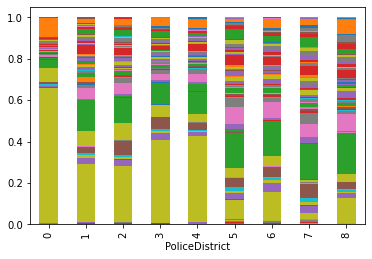

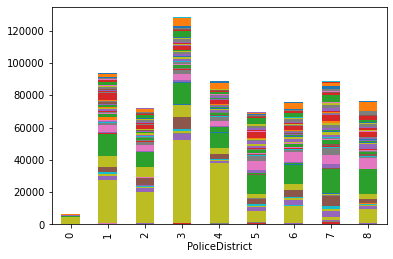

In [ ]:
#here lets make tables and stuff by grouping by zones, type of incidents, and other things that answer our question
#we should be good after this and then in our plan we can say we will be making a map of the data we find and then graphs and such of data stuff than cant be mapped

#remove TypeText where the count is less than 5
new_df = df_Calls.TypeText.value_counts()
new_df>1200 
#df_help = df_Calls[new_df>1200]

type_by_district = df_Calls[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
df_Calls_crossTab = pd.crosstab(df_Calls['PoliceDistrict'],df_Calls['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot(kind='bar',stacked=True, legend=False))
type_by_district.plot(kind='bar', stacked=True, legend=False) #need to convert to marginal distribution for comparison